### Arquivo para Balanceamento do Dataset

In [1]:
import os
import shutil
import random
from PIL import Image

In [2]:

def augment_images(image_path, output_path, num_images):
    
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    transformations = [
        lambda img: img.rotate(90),
        lambda img: img.rotate(180),
        lambda img: img.rotate(270),
        lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),
        lambda img: img.transpose(Image.FLIP_TOP_BOTTOM),
        lambda img: img.rotate(45),
        lambda img: img.rotate(135),
        lambda img: img.rotate(225),
        lambda img: img.rotate(315)
    ]
    
    image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]
    
    for image_file in image_files:
        src_path = os.path.join(image_path, image_file)
        dst_path = os.path.join(output_path, image_file)
        shutil.copy(src_path, dst_path)
    
    current_image_count = len(os.listdir(output_path))
    images_to_add = num_images - current_image_count
    
    if images_to_add > 0:
        print(f"Precisando adicionar {images_to_add} imagens com aumentos.")
        
        existing_images = [f for f in os.listdir(output_path) if os.path.isfile(os.path.join(output_path, f))]
        
        while images_to_add > 0:
            for image_file in random.choices(existing_images, k=images_to_add):
                if images_to_add <= 0:
                    break
                
                src_path = os.path.join(output_path, image_file)
                image = Image.open(src_path).convert("RGB")
                
                for transform in transformations:
                    if images_to_add <= 0:
                        break
                    transformed_image = transform(image)
                    new_image_path = os.path.join(output_path, f"aug_{images_to_add}_{image_file}")
                    transformed_image.save(new_image_path)
                    print(f"Imagem salva: {new_image_path}")
                    images_to_add -= 1

    print("Balanceamento concluído.")




In [3]:
all_class_path = os.listdir("../../data/base_balanceada/train/")
# all_class_path.pop(4)
all_class_path

['ASC-H',
 'ASC-US',
 'HSIL',
 'LSIL',
 'Negative for intraepithelial lesion',
 'SCC']

In [4]:
for each in all_class_path:
  source_path = f'../../data/base_balanceada/train/{each}/'  
  output_path = f'../../data/base_treinamento/train/{each}/' 
  # source_path = f'../../data/base_balanceada/test/{each}/'  
  # output_path = f'../../data/base_treinamento/test/{each}/' 
  num_images = 3000 
  augment_images(source_path, output_path, num_images)


Precisando adicionar 2851 imagens com aumentos.
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2851_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2850_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2849_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2848_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2847_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2846_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2845_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2844_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2843_9783.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2842_13.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2841_13.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2840_13.png
Imagem salva: ../../data/base_treinamento/train/ASC-H/aug_2839_13.png
Imagem salva: ../../data

### Mover Pasta não balanceadas para diretorio de treinamento

In [6]:
cwd = os.getcwd()
# diretorio_train = os.path.join(cwd, "..", ".." ,"data", "base_balanceada", "train", "Negative for intraepithelial lesion")
diretorio_test = os.path.join(cwd, "..", ".." ,"data", "base_balanceada", "test")
diretorio_validacao = os.path.join(cwd, "..", ".." ,"data", "base_balanceada", "validation")


# destino_train = os.path.join(cwd, "..", ".." ,"data", "base_treinamento", "train")
destino_test = os.path.join(cwd, "..", ".." ,"data", "base_treinamento")
destino_validacao = os.path.join(cwd, "..", ".." ,"data", "base_treinamento")


# if not os.path.exists(destino_train):
#   os.makedirs(destino_train)
if not os.path.exists(destino_test):
  os.makedirs(destino_test)
if not os.path.exists(destino_validacao):
  os.makedirs(destino_validacao)
  


# shutil.move(diretorio_train, destino_train)
shutil.move(diretorio_test, destino_test)
# shutil.move(diretorio_validacao, destino_validacao)

'd:\\AREA_DE_TRABALHO\\Faculdade_8_Periodo\\TCC\\VIT-cric\\vit-dynamic-patches\\notebook\\pre-processamento\\..\\..\\data\\base_treinamento\\test'

### Balanceamento em Tempo de Execucao

In [2]:
import PIL
import torch 
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
from torchvision.transforms import v2

In [41]:
img_test = PIL.Image.open(Path('../../data/base_recortada/ASC-H/10.png'))

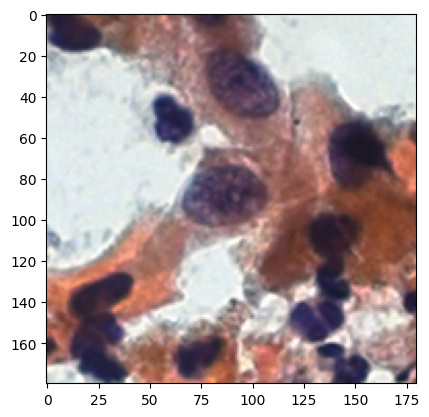

In [11]:
# shape
np.asarray(img_test).shape
plt.imshow(img_test)

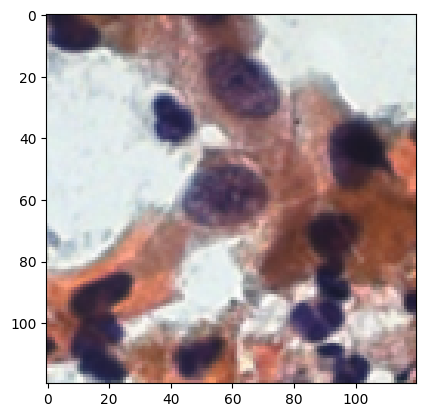

In [12]:
# resize img
resize_transform = v2.Resize((120,120))
resized_image=resize_transform(img_test)
plt.imshow(resized_image)

### Random Functions

In [111]:
# rotation img
random_rotation_transformation_45 = v2.RandomRotation(45)
random_rotation_transformation_85 = v2.RandomRotation(85)
random_rotation_transformation_65 = v2.RandomRotation(65)

random_rotation_gap = v2.RandomRotation((0,360))

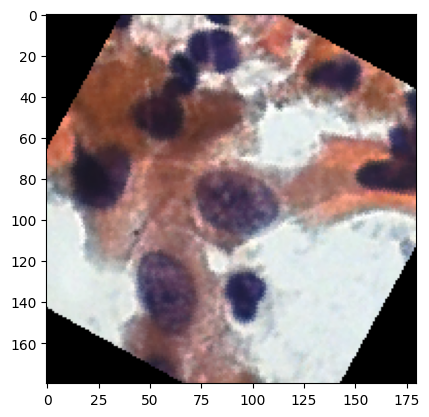

In [123]:
plt.imshow(random_rotation_gap(img_test))

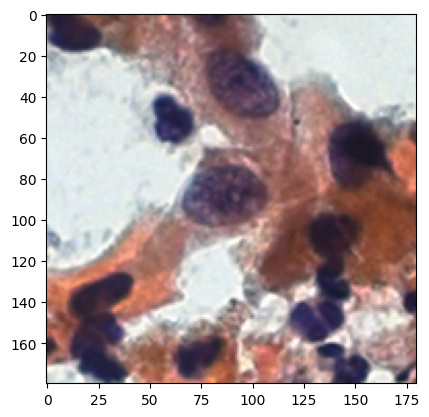

In [25]:
random_flip = v2.RandomHorizontalFlip(p=0.5)
plt.imshow(random_flip(img_test))

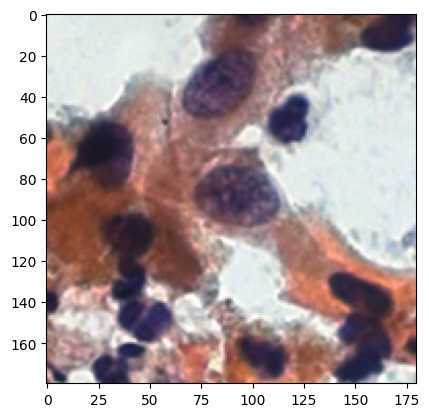

In [33]:
random_vertical_flip = v2.RandomVerticalFlip(p=0.5)
plt.imshow(random_flip(img_test))